# 🎨 Chapter 17: Autoencoders & GANs — Practical Guide

Explore how unsupervised deep learning can learn compact representations and generate realistic data.

## I. 🤏 Efficient Data Representations

Autoencoders learn compressed, meaningful representations by training to reconstruct their inputs.

## II. 🧊 PCA with a Linear Autoencoder

Let's start with a simple linear autoencoder that learns principal components (PCA).

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate random data
X = np.random.rand(1000, 20)

# Define a simple linear autoencoder
auto = models.Sequential([
    layers.Dense(10, activation='linear', input_shape=(20,)),
    layers.Dense(20, activation='linear')
])

# Compile and train
auto.compile(optimizer='adam', loss='mse')
auto.fit(X, X, epochs=20, batch_size=32, verbose=2)

2025-06-20 10:34:39.270290: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-20 10:34:39.627901: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-20 10:34:39.865202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750404880.086264    1085 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750404880.163704    1085 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750404880.693834    1085 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/20
32/32 - 1s - 25ms/step - loss: 0.5795
Epoch 2/20
32/32 - 0s - 4ms/step - loss: 0.3287
Epoch 3/20
32/32 - 0s - 3ms/step - loss: 0.2232
Epoch 4/20
32/32 - 0s - 3ms/step - loss: 0.1673
Epoch 5/20
32/32 - 0s - 3ms/step - loss: 0.1382
Epoch 6/20
32/32 - 0s - 3ms/step - loss: 0.1229
Epoch 7/20
32/32 - 0s - 4ms/step - loss: 0.1132
Epoch 8/20
32/32 - 0s - 3ms/step - loss: 0.1057
Epoch 9/20
32/32 - 0s - 3ms/step - loss: 0.0994
Epoch 10/20
32/32 - 0s - 3ms/step - loss: 0.0939
Epoch 11/20
32/32 - 0s - 4ms/step - loss: 0.0891
Epoch 12/20
32/32 - 0s - 3ms/step - loss: 0.0849
Epoch 13/20
32/32 - 0s - 3ms/step - loss: 0.0810
Epoch 14/20
32/32 - 0s - 3ms/step - loss: 0.0776
Epoch 15/20
32/32 - 0s - 3ms/step - loss: 0.0746
Epoch 16/20
32/32 - 0s - 4ms/step - loss: 0.0719
Epoch 17/20
32/32 - 0s - 3ms/step - loss: 0.0694
Epoch 18/20
32/32 - 0s - 3ms/step - loss: 0.0671
Epoch 19/20
32/32 - 0s - 4ms/step - loss: 0.0651
Epoch 20/20
32/32 - 0s - 3ms/step - loss: 0.0632


## III. 📚 Stacked Autoencoders

### A. Keras Implementation & Visualization

In [2]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load and preprocess data
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

# Define encoder and decoder layers
input_img = layers.Input(shape=(784,))
hidden1 = layers.Dense(128, activation='relu')(input_img)
hidden2 = layers.Dense(64, activation='relu')(hidden1)
hidden3 = layers.Dense(128, activation='relu')(hidden2)
output_layer = layers.Dense(784, activation='sigmoid')(hidden3)

# Build autoencoder model
stacked_ae = models.Model(inputs=input_img, outputs=output_layer)

# Compile
stacked_ae.compile(optimizer='adam', loss='binary_crossentropy')

# Train
stacked_ae.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_test, X_test), verbose=2)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 25s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step
Epoch 1/10
235/235 - 8s - 34ms/step - loss: 0.3670 - val_loss: 0.3110
Epoch 2/10
235/235 - 4s - 17ms/step - loss: 0.3021 - val_loss: 0.2992
Epoch 3/10
235/235 - 4s - 16ms/step - loss: 0.2936 - val_loss: 0.2926
Epoch 4/10
235/235 - 3s - 15ms/step - loss: 0.2887 - val_loss: 0.2895
Epoch 5/10
235/235 - 3s - 14ms/step - loss: 0.2853 - val_loss: 0.2861
Epoch 6/10
235/235 - 4s - 15ms/step - loss: 0.2831 - val_loss: 0.2842
Epoch 7/10
235/235 - 4s - 16ms/step - loss: 0.2812 - val_loss: 0.2826
Epoch 8/10
235/235 - 4s - 17ms/step - loss: 0.2797 - val_loss: 0.2813
Epoch 9/10
235/235 - 4s - 17ms/step - loss: 0.2786 - val_loss: 0.2802
Epoch 10/10
235/235 - 6s - 25ms/step - loss: 0.2775 - val_loss: 0.2793


### B. Visualize Reconstructions

Let's see how well the autoencoder reconstructs some test images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


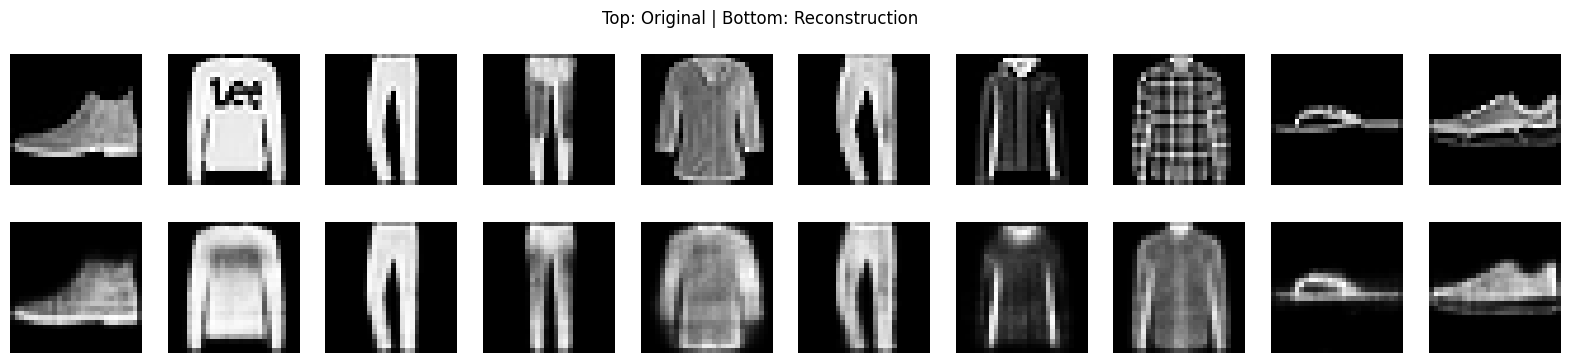

In [3]:
# Predict reconstructions for first 10 test images
recon = stacked_ae.predict(X_test[:10])

# Plot original and reconstructed images
plt.figure(figsize=(20,4))
for i in range(10):
    # Original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.axis('off')
    # Reconstruction
    ax = plt.subplot(2,10,i+11)
    plt.imshow(recon[i].reshape(28,28), cmap='gray')
    plt.axis('off')
plt.suptitle('Top: Original | Bottom: Reconstruction')
plt.show()

## IV. 🌀 Convolutional Autoencoders

Autoencoders can also be built with convolutional layers for images.

In [4]:
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D(2, padding='same')(x)

x = layers.Conv2D(32, 3, activation='relu', padding='same')(encoded)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

conv_ae = models.Model(inputs=input_img, outputs=decoded)

# Compile
conv_ae.compile(optimizer='adam', loss='binary_crossentropy')

# Prepare data
X_train_c = X_train.reshape(-1,28,28,1)

# Train
conv_ae.fit(X_train_c, X_train_c, epochs=10, batch_size=256, verbose=2)

Epoch 1/10
235/235 - 64s - 272ms/step - loss: 0.3175
Epoch 2/10
235/235 - 69s - 293ms/step - loss: 0.2762
Epoch 3/10
235/235 - 77s - 329ms/step - loss: 0.2704
Epoch 4/10
235/235 - 70s - 298ms/step - loss: 0.2670
Epoch 5/10
235/235 - 63s - 267ms/step - loss: 0.2648
Epoch 6/10
235/235 - 58s - 245ms/step - loss: 0.2628
Epoch 7/10
235/235 - 59s - 252ms/step - loss: 0.2611
Epoch 8/10
235/235 - 59s - 252ms/step - loss: 0.2596
Epoch 9/10
235/235 - 57s - 241ms/step - loss: 0.2585
Epoch 10/10
235/235 - 100s - 427ms/step - loss: 0.2576


## V. 🔁 Recurrent Autoencoders

Recurrent autoencoders are suitable for sequence data like text or time series. Due to brevity, code is omitted, but they follow similar structure using RNNs or LSTMs.

## VI. 💧 Denoising Autoencoders

Train autoencoders to remove noise from inputs.

In [ ]:
# Add synthetic noise to training data
noisy_X_train = X_train + np.random.normal(0, 0.5, X_train.shape)
noisy_X_train = np.clip(noisy_X_train, 0., 1.)  # Keep within valid range

# Retrain autoencoder on noisy data
auto.compile(optimizer='adam', loss='mse')  # Recompile if needed
auto.fit(noisy_X_train, X_train, epochs=10, batch_size=256, verbose=2)

## VII. ❗ Sparse Autoencoders

Encourage sparsity in hidden units with regularization.

In [ ]:
sparse_encoder = layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l1(1e-5))

# Build sparse autoencoder
input_img = layers.Input(shape=(784,))
hidden = sparse_encoder(input_img)
output_layer = layers.Dense(784, activation='sigmoid')(hidden)
sparse_autoencoder = models.Model(inputs=input_img, outputs=output_layer)

# Compile
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
sparse_autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, verbose=2)

## VIII. 🌀 Variational Autoencoders (VAEs)

VAEs learn probabilistic latent representations, enabling realistic sampling.

```python
# High-level pseudocode for VAE implementation
# 1. Encoder learns mean and log-variance of latent distribution
# 2. Sample z via reparameterization trick
# 3. Decoder reconstructs input from z
# 4. Loss includes reconstruction + KL divergence
```

## IX. ⚔️ GANs (Generative Adversarial Networks)

GANs involve training a generator and discriminator in a minimax game.

### A. Deep Convolutional GAN Example

Below is pseudocode for the typical training loop of a DCGAN.

In [ ]:
# Pseudocode for training a DCGAN
import tensorflow as tf
from tensorflow.keras import layers, models

# Define generator and discriminator models here...
# For brevity, models are not fully implemented.

# Training loop pseudocode:
for epoch in range(num_epochs):
    for batch in dataset:
        # 1. Train discriminator on real images
        # 2. Generate fake images with generator
        # 3. Train discriminator on fake images
        # 4. Train generator to fool discriminator
        pass

# Note: Implementing full DCGAN training is more involved.
# This pseudocode is a conceptual outline.

### B. Training Difficulties

* ⚠️ Mode collapse, unstable convergence
* Require careful balancing (learning rates, label smoothing, batch norm)

### C. Advanced Architectures

* **DCGAN**: Stable convolutional GANs
* **Progressive GANs**: Incrementally add layers during training
* **StyleGAN**: Style-mixing via adaptive normalization

## ✅ Chapter Summary

* **Autoencoders** learn compact, meaningful data representations.
* **Variational autoencoders** model data generatively via latent distributions.
* **GANs** generate realistic images by pitting two networks against each other.
* Advanced GANs like **StyleGAN** produce high-resolution, photorealistic images.

## 🧠 Exercises to Try

1. Implement a stacked autoencoder and measure compression vs reconstruction loss.
2. Build and train a convolutional denoising autoencoder with added synthetic noise.
3. Code a simple VAE and visualize generated Fashion MNIST samples.
4. Build a DCGAN and train it—track real vs fake image quality over epochs.
5. Try **Progressive Growing GANs** or **StyleGAN**, starting from a simpler version.